# **Churn Data Analysis**

<div style="background-color: lightyellow;border-radius: 10px;color:black;padding:20px;width:1000px;display: flex; justify-content: center;">
<img src="https://images.squarespace-cdn.com/content/v1/588f9607bebafbc786f8c5f8/1607924812500-Y1JR8L6XP5NKF2YPHDUX/image6.png" style="max-width: 100%">
</div>

Customer Churn o abandono de clientes es la tasa de deserción de los clientes respecto a un servicio o producto. Una tasa de churn alta puede señalar problemas con los servicios, productos o en la experiencia del cliente, lo que lleva a la pérdida de ingresos y la necesidad de optimizar los procesos para mejorar la retención de clientes, por tal motivo es necesario un análisis de la tasa de abandono, para detectar donde se encuentra el problema.  

### Propósito del análisis:  
Verificar cuales son las causas de la deserción de los clientes por los diferentes elementos del dataset.

### Dataset usado:
Se utilizó el [Dataset de Kaggle](https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset "Customer Churn Dataset"), que contiene <u>*customer_churn_dataset-testing-master.csv*</u> y <u>*customer_churn_dataset-training-master.csv*</u>, donde testing y training contienen los mismos atributos que son:  

- CustomerID: id secuencial.
- Age: edad del cliente.
- Gender: genero
- Tenure: cuantos meses ha tenido el servicio.
- Usage Frequency: cuantas veces lo usa al mes.
- Support Calls: llamadas de soporte al mes.
- Payment Delay: días de retraso en el mes.
- Subscription Type: Si es Basic, Premium o Standard.
- Contract Length: duración del contrato en meses, años o trimestres.
- Total Spend: gasto total.
- Last Interaction: ultima vez que se uso el servicio o que se uso soporte. Es un atributo ambiguo, estará en el análisis, pero no se tomarán conclusiones de este.
- Churn: si desistió del servicio o no. 1:Churn; 0:No Churn.




In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

## **1. ETL**


### (Extraer) Importar Datos


In [6]:
df_train= pd.read_csv("customer_churn_dataset-training-master.csv")
df_test = pd.read_csv("customer_churn_dataset-testing-master.csv")

df_train.shape, df_test.shape

((440833, 12), (64374, 12))

### (Transformar) Verificación de Datos


In [3]:
df_train[df_train.isnull().any(axis=1)]  # filas con al menos un nulo en df train

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_test[df_test.isnull().any(axis=1)] # filas con al menos un nulo en df test

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


In [7]:
df_train.dropna(inplace=True) #borrar valores nulos
df_train.shape

(440832, 12)

In [6]:
df_train.duplicated().any(), df_test.duplicated().any() #verificar si hay valores duplicados

(np.False_, np.False_)

In [5]:
df_train['Churn'].value_counts(normalize=True)- df_test['Churn'].value_counts(normalize=True)


Churn
0.0   -0.093422
1.0    0.093422
Name: proportion, dtype: float64

- La diferencia porcentual entre Training y Churn no es alta


### (Cargar) Fusión de datasets corregidos


Para evitar problemas de desbalance en los datos, se fusionará Training con Testing


In [8]:
df = pd.concat([df_train, df_test],axis=0)
df.reset_index(drop=True, inplace=True)
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
505201,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0
505202,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0
505203,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0
505204,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0


## **2. Exploración de datos (EDA)**


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505206 entries, 0 to 505205
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


In [10]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [11]:
df.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


In [12]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


### 1. Análisis Univariado


In [7]:
# Variables numéricas y categóricas
num_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 
            'Payment Delay', 'Last Interaction', 'Total Spend']
cat_cols = ['Gender', 'Subscription Type', 'Contract Length', 'Churn']

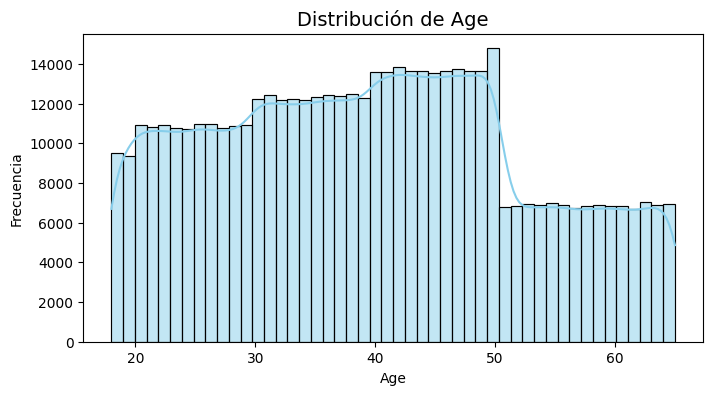

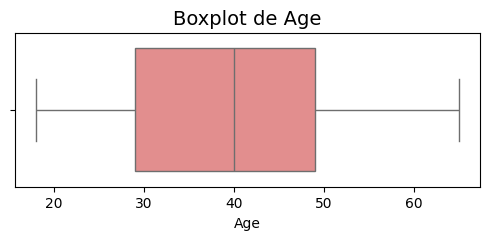

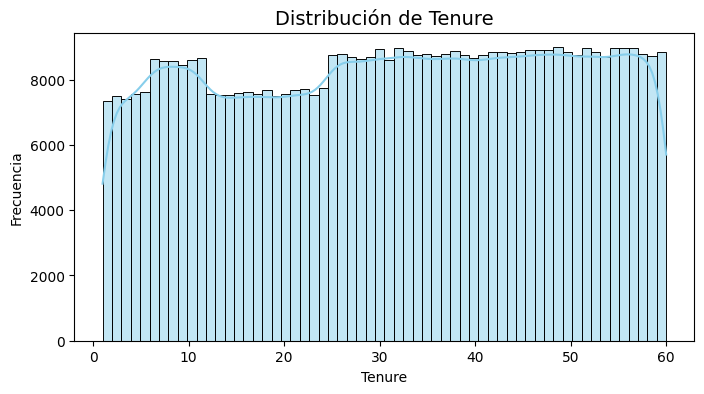

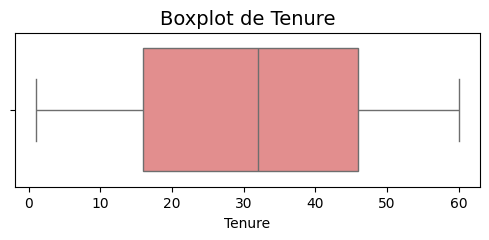

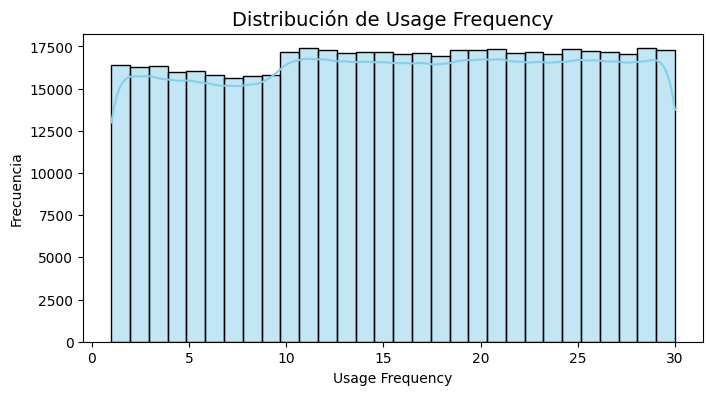

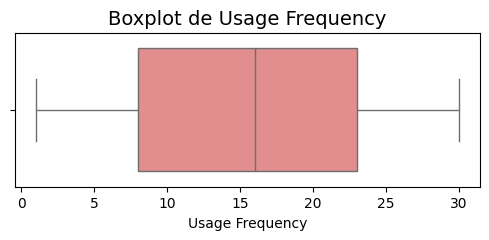

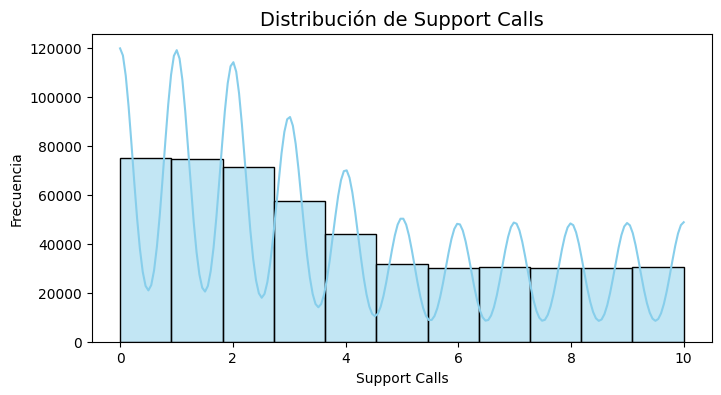

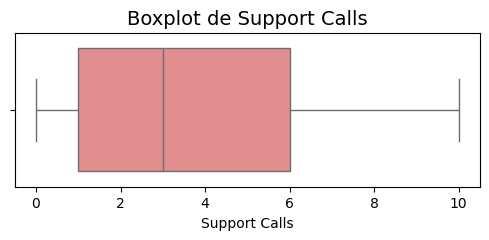

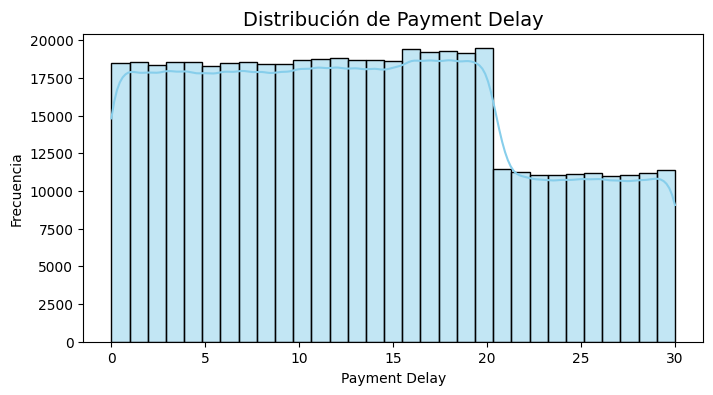

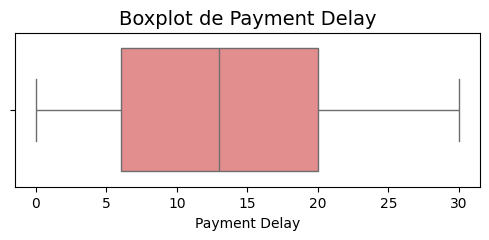

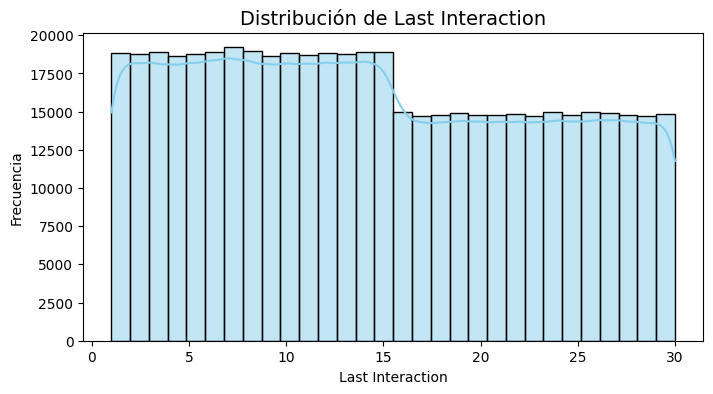

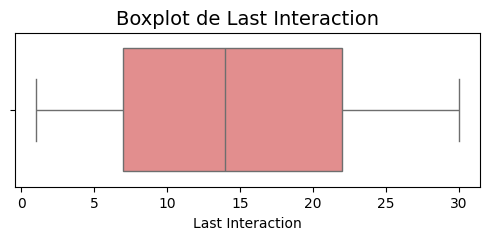

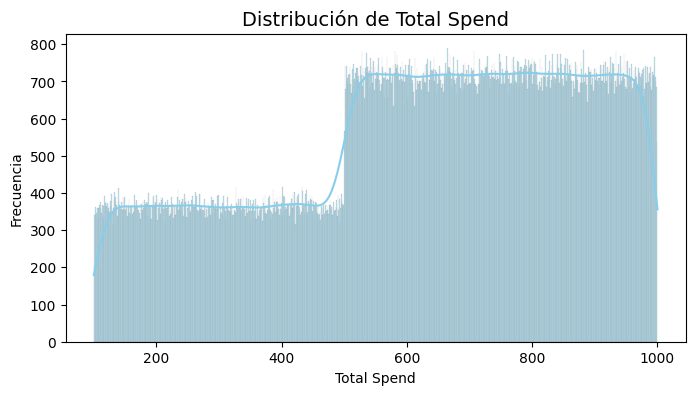

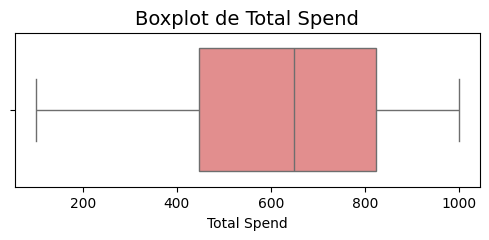

In [14]:
# 🔹 Análisis univariado de variables numéricas
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=int(df[col].max()-df[col].min()+1), color='skyblue')  
    plt.title(f'Distribución de {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()
    
    # Boxplot para ver outliers
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot de {col}', fontsize=14)
    plt.show()

<div style="background-color: lightyellow;border-radius: 10px;color:black;padding:20px;width:1000px">
<h4>📊 Conclusiones de análisis de columnas numéricas</h4>

1. La mayoría de clientes están entre 40 y 50 años y en los 50 años está la concentración más alta de clientes. Desde los 51 años se nota una caída en los clientes.
2. La permanencia de los clientes generalmente es igual, donde los cambios estan en los meses 1-5 y 12-24 donde la permanencia baja. En promedio se quedan 31,35 meses.
3. La frecuencia de uso de los servicios (por mes) es levemente menor los primeros 9 meses, donde luego se hace estable. Se usa en promedio 15,7 veces los servicios al mes.
4. La mayoría de clientes no hacen llamadas de soporte al mes. Los que si las hacen, la mayoría lo hace de 1 a 3 veces, donde el promedio de llamdas es de 3 al mes.
5. En el retraso del pago (en días) se notan 3 secciones: los días 0-15, donde los clientes pagan regularmente. Del 16-20 donde se paga de preferencia y donde el 20 es el día en que se paga más. Y del 21-30 donde no es tan común realizar pagos. En promedio, se paga el día 13.
6. La distribución de última interacción refiere al último día que hubo interacción del cliente, pero no es claro el dataframe si se refiere a servicio al cliente o al uso del servicio en sí mismo. Igualmente la mayoría de interacciones se dan los primeros 15 días.
7. El gasto total promedio es de 620USDT, sin embargo, se puede observar que desde 500USDT, hay más clientes. *Se podría decir que los clientes de alto valor son los de 500USDT en adelante*.
</div>


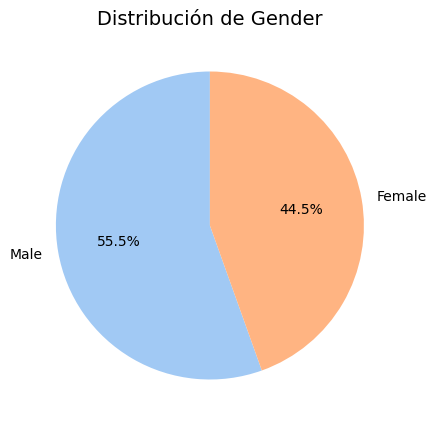

,Categoría,Cantidad
0,Male,280273
1,Female,224933


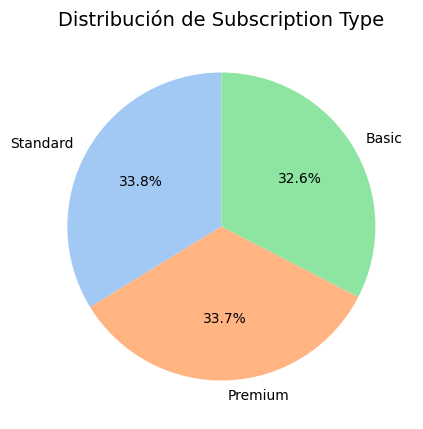

,Categoría,Cantidad
0,Standard,170630
1,Premium,170099
2,Basic,164477


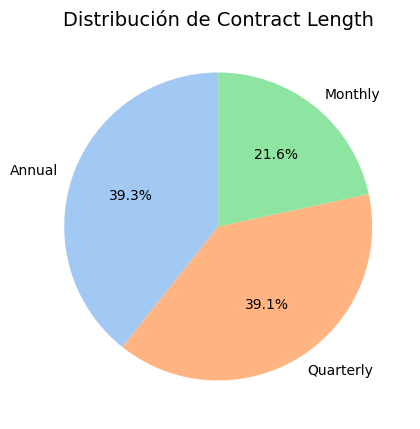

,Categoría,Cantidad
0,Annual,198608
1,Quarterly,197364
2,Monthly,109234


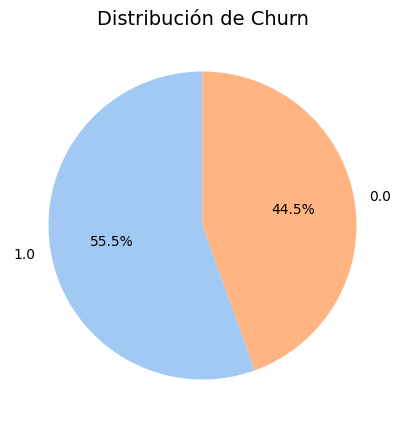

,Categoría,Cantidad
0,1.0,280492
1,0.0,224714


In [15]:
# 🔹 Análisis univariado de variables categóricas con gráficos de torta y tabla resumen
for col in cat_cols:
    plt.figure(figsize=(5,5))
    
    valores = df[col].value_counts()
    porcentajes = valores / valores.sum() * 100
    
    # Gráfico de torta
    plt.pie(valores, labels=valores.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    plt.title(f'Distribución de {col}', fontsize=14)
    plt.show()
    
    # Tabla con valores absolutos y porcentajes
    resumen = pd.DataFrame({
        "Categoría": valores.index,
        "Cantidad": valores.values
    })
    display(resumen) 


<div style="background-color: lightyellow;border-radius: 10px;color:black;padding:20px;width:1000px">
<h4>📊 Conclusiones de análisis de columnas categóricas</h4>

1. Hay más compradores hombres.
2. La distribución del tipo de suscripción esta muy balanceada.
3. Los contratos trimestrales y anuales son los más preferidos por los clientes, además de estar balanceados entre ellos. El contrato mensual es el menos elegido.
4. Son más los clientes que se retiran, con el 55%.
</div>

### 2. Análisis Multivariado


Se reliza mapa de correlaciones para identificar atributos relacionados con el retiro de los clientes, además de observar otras posibles relaciones entre atributos.

In [8]:
df_copy = df.copy(deep=True)  

df_copy=df_copy.drop('CustomerID',axis=1)
df_copy = pd.get_dummies(data=df_copy,columns=["Gender","Subscription Type","Contract Length"],dtype=int)

df_copy


,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,1,0,0,0,1,1,0,0
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,1,0,1,0,0,0,1,0
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,1,0,1,0,0,0,0,1
3,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0,0,1,0,0,1,0,1,0
4,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505201,45.0,33.0,12.0,6.0,21.0,947.0,14.0,1.0,1,0,1,0,0,0,0,1
505202,37.0,6.0,1.0,5.0,22.0,923.0,9.0,1.0,0,1,0,0,1,1,0,0
505203,25.0,39.0,14.0,8.0,30.0,327.0,20.0,1.0,0,1,0,1,0,0,1,0
505204,50.0,18.0,19.0,7.0,22.0,540.0,13.0,1.0,1,0,0,0,1,0,1,0


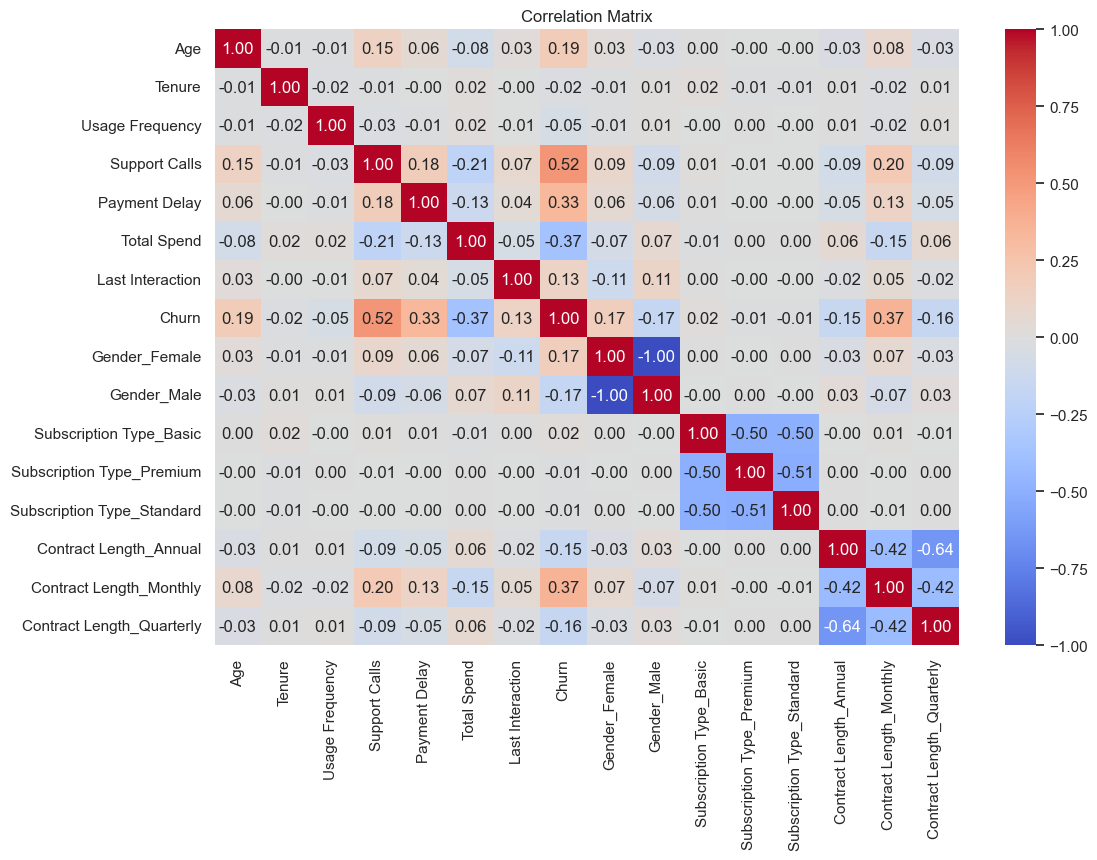

In [71]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=df_copy.corr(),  annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<div style="background-color: lightyellow;border-radius: 10px;color:black;padding:20px;width:1000px">
<h4>📊 Conclusiones de análisis de mapa de correlación</h4>
Para este análisis se tomaran variables absolutas mayores a (0.15), pero teniendo en cuenta si hay diferencias en las variables categoricas de su propia categoría.

1. Más conteos de perdidas del cliente cuando:
    - Se tiene más edad (0.19).
    - Se hacen más llamadas de soporte (0.52).
    - Se retrasan en los pagos (0.33).
    - El gasto total es menor (-0.37).
    - La duración de los contratos es mensual (0.37).
2. Existe proporcionalidad entre llamadas de soporte con retrasos en el pago (0.18), y también con contratos de duración mensual (0.20), además de que el gasto es inversamente proporcional (-0.21).

</div>

Se realizan preguntas para variables numéricas respecto a la perdida del cliente.  

 - ¿Realmente la edad influye en la perdida del cliente?
 - ¿Existe una relación entre la permanencia y el retiro?
 - ¿La Frecuencia del uso del servicio puede indicar un nivel de retiro si se hace en menor medida?
 - ¿Más llamadas a soporte pueden implicar un retiro?
 - ¿Retrasos en el pago implican más posibilidades de retirarse?
 - ¿Entre más gastos haya, es más probable que un cliente se retire?


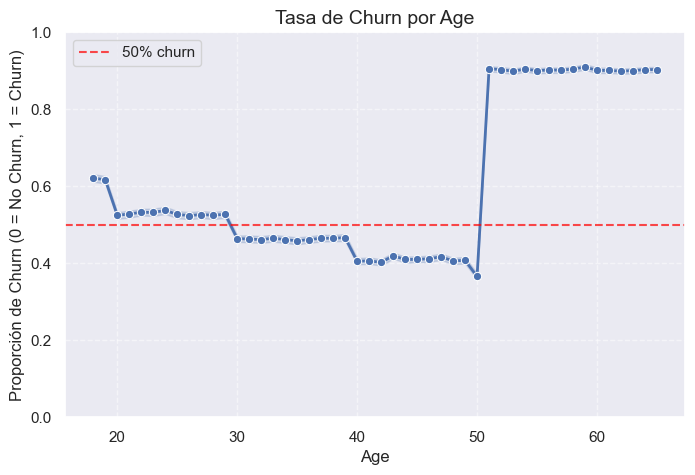

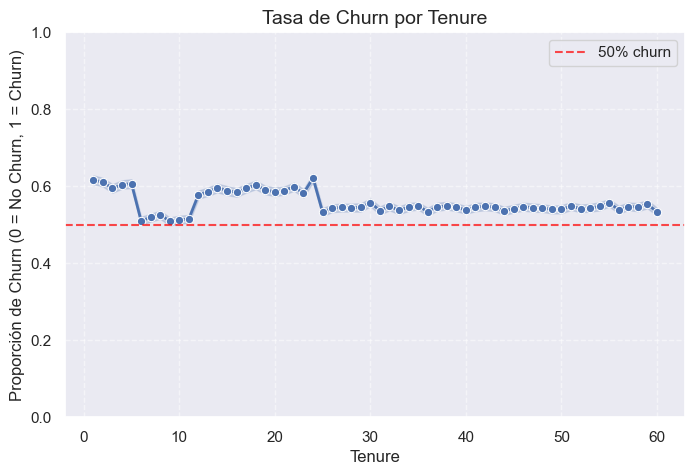

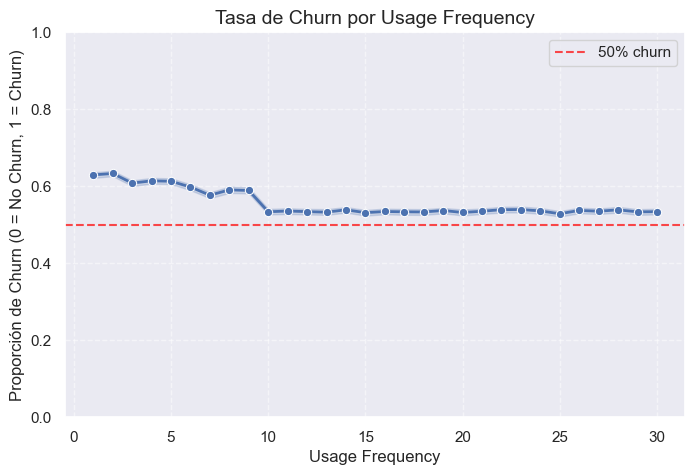

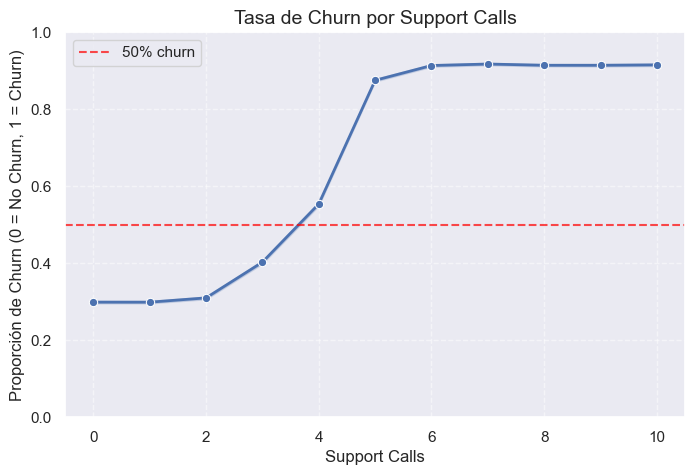

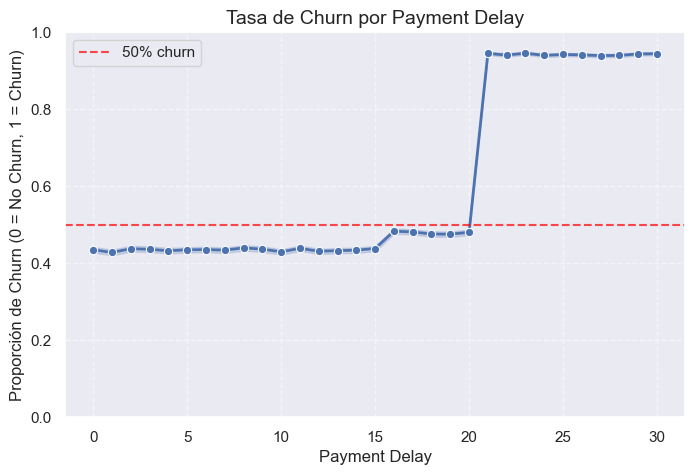

In [65]:
num_cols_sintotal=num_cols[0:5]
for col in num_cols_sintotal:
    plt.figure(figsize=(8,5))
    sns.lineplot(data=df, x=col, y="Churn", marker="o", linewidth=2)

    # Mejoras en la visualización
    plt.axhline(0.5, color="red", linestyle="--", alpha=0.7, label="50% churn")
    plt.title(f"Tasa de Churn por {col}", fontsize=14)
    plt.xlabel(f"{col}")
    plt.ylabel("Proporción de Churn (0 = No Churn, 1 = Churn)")
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)

    plt.show()

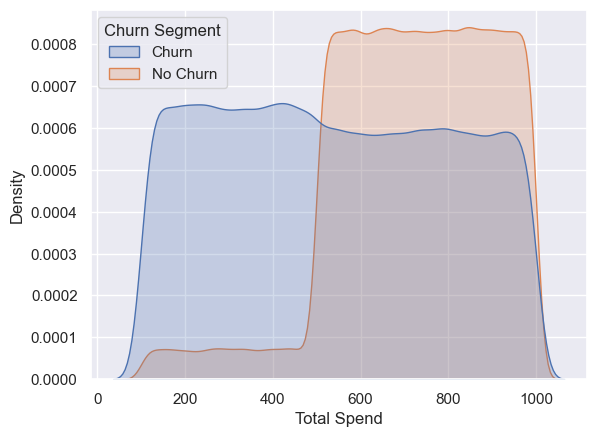

In [84]:
filtered = df.copy()
filtered['Churn Segment'] = ['Churn' if x == 1.0 else 'No Churn' for x in df['Churn']]

plt.Figure(figsize=(10,10))
sns.kdeplot(data=filtered,x="Total Spend",hue="Churn Segment",fill=True)
plt.show()

<div style="background-color: lightyellow;border-radius: 10px;color:black;padding:20px;width:1000px">
<h4>📊 Respuestas de preguntas para atributos numéricos</h4>

1. Influye a partir de los 51 años, donde la mayoría de clientes prefieren el retiro del servicio.
2. La permanencia solo aumenta en los meses 1-5 y 12-24, donde se tiene una ligera preferencia al retiro, luego se estabiliza.
3. Si el servicio se usa menos de 10 veces, hay una ligera preferencia al retiro, donde entre menos se use, es más probable el retiro.
4. Entre más llamadas de soporte, más probable el retiro del cliente.
5. Si el retraso del pago se hace a partir del día 21, es muy probable (0.90) de que se retire la persona.
6. Entre más gasto total haya, más personas se quedan con el servicio.

</div>

Se realizan preguntas para variables numéricas respecto a la perdida del cliente.  

- ¿Existe una relación entre genero y el retiro?
- ¿Según el tipo de subscripción alguién se puede retirar?
- ¿Existe relación entre la duración del contrato y el retiro?

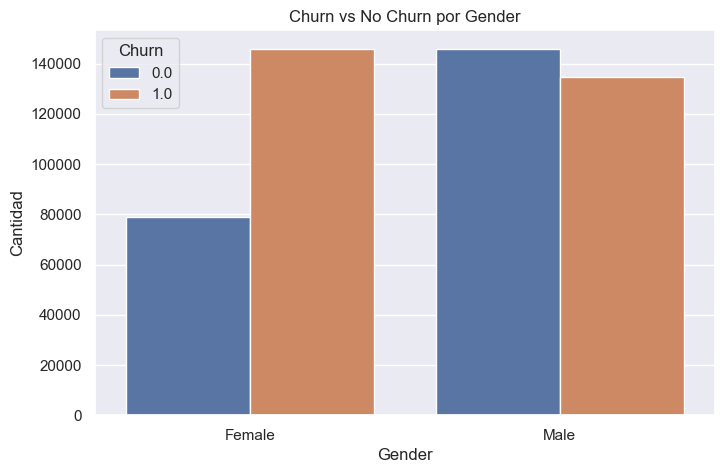

,Gender,Churn,Count,Percent_in_Gender
0,Female,0.0,78964,35.1
1,Female,1.0,145969,64.9
2,Male,0.0,145750,52.0
3,Male,1.0,134523,48.0


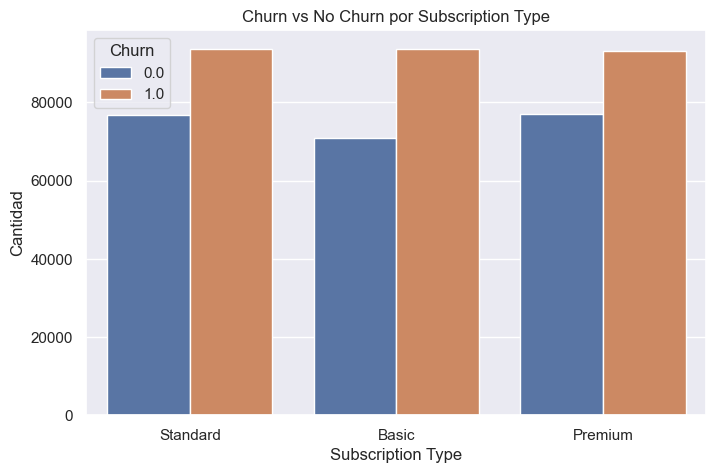

,Subscription Type,Churn,Count,Percent_in_Subscription Type
0,Basic,0.0,70911,43.1
1,Basic,1.0,93566,56.9
2,Premium,0.0,76966,45.2
3,Premium,1.0,93133,54.8
4,Standard,0.0,76837,45.0
5,Standard,1.0,93793,55.0


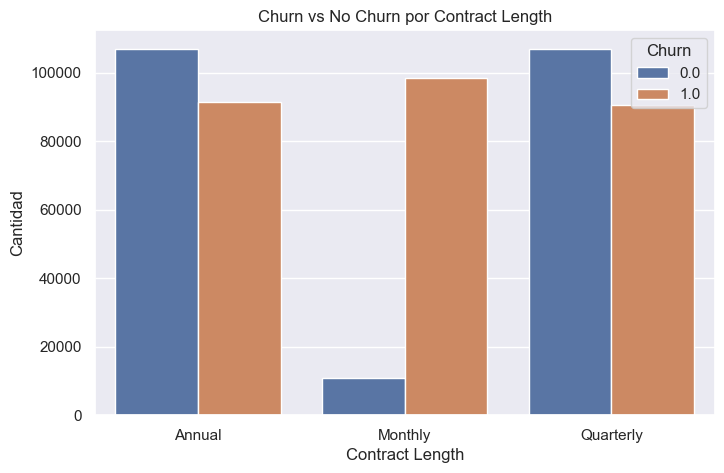

,Contract Length,Churn,Count,Percent_in_Contract Length
0,Annual,0.0,107067,53.9
1,Annual,1.0,91541,46.1
2,Monthly,0.0,10709,9.8
3,Monthly,1.0,98525,90.2
4,Quarterly,0.0,106938,54.2
5,Quarterly,1.0,90426,45.8


In [68]:
for col in cat_cols[0:3]:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, hue="Churn")
    plt.title(f"Churn vs No Churn por {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Cantidad")
    plt.show()

    # Agrupar y contar
    grouped = df.groupby([col, "Churn"]).size().reset_index(name="Count")

    # Calcular % dentro de cada género usando transform
    grouped[f"Percent_in_{col}"] = (
        grouped["Count"] / grouped.groupby(col)["Count"].transform("sum") * 100
    ).round(1)

    display(grouped)


<div style="background-color: lightyellow;border-radius: 10px;color:black;padding:20px;width:1000px">
<h4>📊 Respuestas de preguntas para atributos numéricos</h4>

1. A pesar de que casi la misma cantidad de hombres y mujeres se retiran, en porcentaje por genero, las mujeres se retiran más.
2. Los tipos de suscripción no son concluyentes respecto a si un cliente se puede retirar o no.
3. El 90,2% de los clientes con contratos de duración mensual se retiran, los demás planes son más los clientes que se quedan.

</div>

## 3. Modelamiento Con Machine Learning

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import time

Se realizan uso de tres algoritmos predictivos de machine learning para evaluar que clientes se van (Churn) y cuales se quedan (No Churn). Se evalúa con:  
- Regresión logistica (Logistic Regression).  
- Bosque aleatorio (Random Forest).
- XGBoost.

In [9]:
# =============================
# 1. Dividir variables
# =============================
num_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 
            'Payment Delay', 'Last Interaction', 'Total Spend']
cat_cols = ['Gender', 'Subscription Type', 'Contract Length']

X = df[num_cols + cat_cols]
y = df['Churn']

# =============================
# 2. Preprocesamiento
# =============================
numeric_transformer = StandardScaler()#Para escalar variables numéricas.
categorical_transformer = OneHotEncoder(handle_unknown="ignore")#convertir variables categóricas a numéricas (1 o 0).

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

In [14]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
    )
}

for name, model in models.items():
    clf = Pipeline(steps=[("preprocessor", preprocessor),("classifier", model)])
    # =============================
    # 4. Entrenamiento y evaluación
    # =============================
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    inicio = time.perf_counter()
    clf.fit(X_train, y_train)    
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:,1]
    fin = time.perf_counter()
    # =============================
    # 5. Métricas
    # =============================
    results = {
        "Name":name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_proba)
    }

    print(f"Resultados {name}:")
    print(pd.Series(results))
    print(f"El modelo tardó {fin-inicio:.4f} s en ejecutarse.")

Resultados Logistic Regression:
Name         Logistic Regression
Accuracy                0.846044
Precision               0.871776
Recall                  0.847113
F1                      0.859268
AUC-ROC                 0.906871
dtype: object
El modelo tardó 1.9281 s en ejecutarse.
Resultados Random Forest:
Name         Random Forest
Accuracy          0.933701
Precision         0.895668
Recall            0.996593
F1                0.943439
AUC-ROC           0.952061
dtype: object
El modelo tardó 261.8962 s en ejecutarse.


c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:32:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Resultados XGBoost:
Name          XGBoost
Accuracy     0.931919
Precision    0.895927
Recall       0.992597
F1           0.941788
AUC-ROC      0.952797
dtype: object
El modelo tardó 12.8952 s en ejecutarse.


<div style="background-color: lightyellow;border-radius: 10px;color:black;padding:20px;width:1000px">
<h4>📊 Conclusión de algoritmos de Machine Learning</h4>

1. **Accuracy:** Se tiene una exactitud mayor al 84% de los tres modelos, lo que indica que más del 84% de las predicciones fueron correctas, e indican un buen resultado de los modelos de ML. Aclarar que Random Forest y XGBoost tuvieron valores mayores al 93%.
2. **Precision:** Se tiene una precisión mayor al 87% de los tres modelos, lo que indica una buena confiabilidad de las predicciones. Aclarar que Random Forest y XGBoost tuvieron precisiones mayores al 89%.
3. **Recall:** Se tiene una tasa de verdaderos postivos mayor al 84% en los tres modelos. Refleja que los clientes que realmente se fueron, fueron detectados por el modelo. Aclarar que Random Forest y XGBoost tuvieron valores mayores al 99%.
4. **F1 Score:** el balance entre Precision y Recall es mayor al 85% en los tres modelos. Refleja que los modelos casi nunca se equivocan y detectan varias deserciones. Aclarar que Random Forest y XGBoost tuvieron valores mayores al 94%.
5. **AUC-ROC:** el área bajo la curva ROC es mayor al 90% en los tres modelos. Refleja una buena separación entre los clientes que se van de los que no se van.  

En cuanto a eficiencia vs eficacia, XGBoost tiene ambas, random forest es eficaz, más no eficiente, Logistic Regression no es tan eficaz como los otros dos modelos, pero es eficiente.
</div>

Se evaúa cuales son las variables que más importancia tienen en la determinación respecto a la no permanencia (Churn) de un cliente.

C:\Users\kevin\AppData\Local\Temp\ipykernel_10008\2166543201.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")


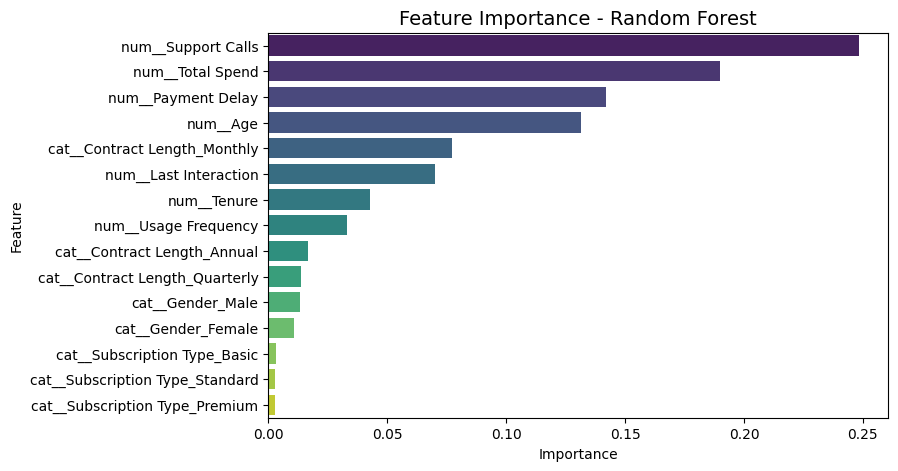

,Feature,Importance
3,num__Support Calls,0.25
6,num__Total Spend,0.19
4,num__Payment Delay,0.14
0,num__Age,0.13
13,cat__Contract Length_Monthly,0.08
5,num__Last Interaction,0.07
1,num__Tenure,0.04
2,num__Usage Frequency,0.03
12,cat__Contract Length_Annual,0.02
14,cat__Contract Length_Quarterly,0.01


In [38]:
importances = models["Random Forest"].feature_importances_
features = preprocessor.get_feature_names_out()

# Ordenar por importancia
feat_imp = pd.DataFrame({"Feature": features, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False).head(15)

# Gráfico
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
plt.title("Feature Importance - Random Forest", fontsize=14)
plt.show()

feat_imp[["Feature", "Importance"]].assign(
    Importance = feat_imp["Importance"].round(2)
)

<div style="background-color: lightyellow;border-radius: 10px;color:black;padding:20px;width:1000px">
<h4>📊 Conclusión de atributos con más importancia en la determinación de la predicción de Churn</h4>

Las llamadas de soporte (25%), el gasto total (19%), el retraso en el pago (14%) y la edad (13%) son los atributos más influyentes en la predicción de la deserción de un cliente en ese respectivo orden.
</div>

Se creará una clase para realizar pruebas con datos de un cliente, y determinar si hará churn o no churn.

In [ ]:
import joblib
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", models["XGBoost"])
])
# Guardar el pipeline entrenado
joblib.dump(clf, "xgb_churn_model.pkl")

['xgb_churn_model.pkl']